<a href="https://colab.research.google.com/github/PedroPavanii/projeto-shark/blob/main/Shark_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aumento de ataques de tubarão em Pernambuco-BR e sua relação com obras no porto de Suape.**

# **Limpando os dados:**

## **Importando as bibliotecas para visualizações gráficas e análises:**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/drive')
tabela_shark = pd.read_excel('/drive/MyDrive/Shark/GSAF5.xls')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## **Explorando o dado bruto:**

In [2]:
tabela_shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6840 non-null   object 
 1   Year                    6838 non-null   float64
 2   Type                    6820 non-null   object 
 3   Country                 6790 non-null   object 
 4   Area                    6362 non-null   object 
 5   Location                6279 non-null   object 
 6   Activity                6257 non-null   object 
 7   Name                    6621 non-null   object 
 8   Sex                     6263 non-null   object 
 9   Age                     3869 non-null   object 
 10  Injury                  6805 non-null   object 
 11  Fatal (Y/N)             6282 non-null   object 
 12  Time                    3339 non-null   object 
 13  Species                 3757 non-null   object 
 14  Investigator or Source  6821 non-null   

In [3]:
tabela_shark.head(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,25-Mar-2023,2023.0,Unprovoked,USA,Florida,"Blue Fish Channel, Key West, Monroe County",Kite-Surfing,Kevin Carlton Scott,M,67,...,NaN,"Yahoo News, 3/28/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22-Mar-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Delta Island,Wading,Adam Norton,M,30s,...,NaN,"A. Currie, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-Mar-2023,2023.0,Unprovoked,USA,Hawaii,Anaehoomalu Bay,Swimming,male,M,60,...,NaN,"Khon2, 3/19/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17-Mar-2023,2023.0,Unprovoked,MEXICO,Quintana Roo,Cancún,Swimming,Dillon Armijo,M,10,...,NaN,"Denver7, 3/29/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16-Mar-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Cheynes Beach,Surf-sking,female,F,NaN,...,5m to 6m shark,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tabela_shark.tail(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
6860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tabela_shark.isna().sum()

Date                        25
Year                        27
Type                        45
Country                     75
Area                       503
Location                   586
Activity                   608
Name                       244
Sex                        602
Age                       2996
Injury                      60
Fatal (Y/N)                583
Time                      3526
Species                   3108
Investigator or Source      44
pdf                         66
href formula                46
href                        69
Case Number                 67
Case Number.1               68
original order              66
Unnamed: 21               6864
Unnamed: 22               6863
dtype: int64

## **Funções utilizadas no processo:**

In [6]:
#LISTAS DE FUNÇÕES UTILIZADAS NO CODIGO
def limpar_coluna_string(df, coluna):
    """
    Função que remove espaços antes e depois das palavras em uma coluna de um DataFrame,
    converte para caixa alta e remove caracteres do tipo ? e / do meio das palavras.
    
    Argumentos:
    - df: pandas.DataFrame - O DataFrame que contém a coluna a ser limpa.
    - coluna: str - O nome da coluna a ser limpa.
    
    Retorno:
    - dataframe
    """
    import re

    # verifica se a coluna é uma instância de pandas.Series
    if isinstance(df[coluna], pd.Series):
        # converte a coluna em uma string
        df[coluna] = df[coluna].astype(str)

    # remove espaços antes e depois das palavras e converte para caixa alta
    df[coluna] = df[coluna].str.strip().str.upper()

    # remove caracteres ? e / do meio das palavras
    df[coluna] = df[coluna].apply(lambda x: re.sub('[/?\.]', '', x))
    return df

## **Realizando a limpeza, subtituições e retiradas do DataFrame original:**

In [7]:
#RETIRANDO LINHAS 100% NULAS E COLUNAS QUE NÃO TEM SIGNIFICADO PARA O ESTUDO E COLOCANDO 'UNKNOWN' EM COLUNAS QUE SÃO RELEVANTES.
tabela_shark = tabela_shark.drop([ 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number','Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1).dropna(how = 'all')
tabela_hark = tabela_shark['Location'].fillna('UNKNOWN', inplace = True)
tabela_hark = tabela_shark['Area'].fillna('UNKNOWN', inplace = True)

In [8]:
#TRATAMENTO DE STRING PARA CAIXA ALTA,RETIRANDO ESPAÇOS NO COMEÇO E FINAL. FUNÇÃO DESCRITA NO TOPICO DE FUNÇÕES. MELHORANDO A VISUALIZAÇÃO DA COLUNA DE PAÍSES. 
tabela_shark = limpar_coluna_string(tabela_shark,'Country')
tabela_shark['Country'] = tabela_shark['Country'].replace('JA MAICA', 'JAMAICA')

In [9]:
# TRATAMENTO DA COLUNA AREA, SUBSTITUICAO DOS NUMEROS DE COORDENADAS POR OUTROS TENDO EM VISTA AS COORDENADAS ESTAREM INCOMPLETAS.
pattern = r'\d+[º.,]\s*[SNLW]'
tabela_shark['Area'] = tabela_shark['Area'].replace('.*\d.*', 'UNKNOWN', regex = True )
tabela_shark['Area'] = tabela_shark['Area'].replace(r'\.', ' ', regex=True)


In [10]:
# TRATAMENTO DA COLUNA AREA, SUBSTITUICAO DOS NUMEROS DE COORDENADAS POR OUTROS TENDO EM VISTA AS COORDENADAS ESTAREM INCOMPLETAS E REMOVENDO.
tabela_shark['Location'] = tabela_shark['Location'].replace('.*\d.*', 'UNKNOWN', regex = True )
tabela_shark['Location'] = tabela_shark['Location'].replace('[.?]', ' ', regex = True)

In [11]:
#REALIZO A CONVERSAO DA COLUNA DATE EM STR E PASSO PORA O FORMATO DATETIME
tabela_shark['Date'] = pd.to_datetime(tabela_shark['Date'], dayfirst=True, errors='coerce')


#CRIO UMA NOVA COLUNA COM OS ANOS CONTIDOS NA COLUNA DATA
tabela_shark['Years'] = tabela_shark['Date'].apply(lambda x: x.year if x is not pd.NaT else pd.NaT)


# SUBSTITUO OS NAN POR UNKNOWN
tabela_shark['Date'] = tabela_shark['Date'].fillna('UNKNOWN')
tabela_shark['Years'] = tabela_shark['Date'].fillna('UNKNOWN')



#REALIZO A MELHORA ESTETICA DAS COLUNAS
tabela_shark['Date'] = tabela_shark['Date'].astype(str).str.replace('00:00:00', ' ')
tabela_shark['Year'] = tabela_shark['Year'].astype(str).str.replace(r'(?<![A-Za-z0-9])0\.0','unknown', regex = True)
tabela_shark['Year'] = tabela_shark['Year'].replace('1000.0','unknown')
tabela_shark['Year'] = tabela_shark['Year'].replace('77.0','unknown')
tabela_shark['Year'] = tabela_shark['Year'].replace('5.0','unknown')
tabela_shark['Year'] = tabela_shark['Year'].replace('nan','unknown')

<ipython-input-11-1a3579d545d4>:2: UserWarning: Parsing '12-30-1980' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tabela_shark['Date'] = pd.to_datetime(tabela_shark['Date'], dayfirst=True, errors='coerce')
<ipython-input-11-1a3579d545d4>:2: UserWarning: Parsing '06-26-1890' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tabela_shark['Date'] = pd.to_datetime(tabela_shark['Date'], dayfirst=True, errors='coerce')


# **Analisando e comparando os casos de ataques nos estados litoraneos do Brasil em relação a Pernambuco:**

## Definindo e explorando o novo DataFrame:

In [12]:
tabela_br = tabela_shark[tabela_shark['Country'] == 'BRAZIL']
tabela_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 5 to 6633
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         122 non-null    object
 1   Year         122 non-null    object
 2   Type         122 non-null    object
 3   Country      122 non-null    object
 4   Area         122 non-null    object
 5   Location     122 non-null    object
 6   Activity     113 non-null    object
 7   Name         117 non-null    object
 8   Sex          108 non-null    object
 9   Age          73 non-null     object
 10  Injury       120 non-null    object
 11  Fatal (Y/N)  113 non-null    object
 12  Time         48 non-null     object
 13  Species      41 non-null     object
 14  Years        122 non-null    object
dtypes: object(15)
memory usage: 15.2+ KB


In [13]:
tabela_br.head(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Years
5,2023-03-06,2023.0,Unprovoked,BRAZIL,Pernambuco,Piedade Beach,Swimming,Kaylane Timóteo Freitas,F,15,Left arm severly injured,N,14h20,NaN,2023-03-06 00:00:00
6,2023-03-05,2023.0,Unprovoked,BRAZIL,Pernambuco,Piedade Beach,Swimming,male,M,14,Right thigh bitten resulting in surgical amput...,N,NaN,NaN,2023-03-05 00:00:00
8,2023-02-21,2023.0,Unprovoked,BRAZIL,Pernambuco,Praia de Milagres,Surfing,André Luiz Gomes da Silva,M,32,Injuries to left thih and calf,N,16h30,NaN,2023-02-21 00:00:00
124,UNKNOWN,2021.0,Unprovoked,BRAZIL,São Paulo,Boqueirão Beach,Playing,male,M,11,Minor cuts to left thigh,NaN,12h00,dogfish,UNKNOWN
127,2021-11-03,2021.0,Unprovoked,BRAZIL,São Paulo,Ubatuba Beach,Swimming,male,M,NaN,Laceration to lower right leg,N,NaN,NaN,2021-11-03 00:00:00


In [14]:
tabela_br.tail(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Years
5651,1927-10-25,1927.0,Sea Disaster,BRAZIL,Porto Seguro,UNKNOWN,Italian liner Principessa Mafalda sank,NaN,NaN,NaN,"Of 1256 on board, 295 perished, some were take...",Y,12h00,NaN,1927-10-25 00:00:00
6277,1887-01-20,1887.0,Sea Disaster,BRAZIL,Alagoas,Maceió,The passenger ship Kapuna was run down the ore...,Whittle,M,NaN,FATAL,Y,03h00,NaN,1887-01-20 00:00:00
6309,UNKNOWN,1884.0,Unprovoked,BRAZIL,UNKNOWN,Bahia,Fell overboard from the steamship Chala,male,M,NaN,FATAL,Y,NaN,NaN,UNKNOWN
6380,1878-02-02,1878.0,Sea Disaster,BRAZIL,UNKNOWN,UNKNOWN,Washed off raft,escaped convict,M,NaN,FATAL,Y,NaN,NaN,1878-02-02 00:00:00
6633,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,a seaman from the ship Beverly,M,NaN,Leg severed,N,NaN,NaN,1826-12-01 00:00:00


In [15]:
tabela_br.isna().sum()

Date            0
Year            0
Type            0
Country         0
Area            0
Location        0
Activity        9
Name            5
Sex            14
Age            49
Injury          2
Fatal (Y/N)     9
Time           74
Species        81
Years           0
dtype: int64

## Para continuação **do** estudo realizarei a eliminação das colunas e sem relevância:

In [37]:
df_br = tabela_br.drop(['Type', 'Activity','Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Years'], axis = 1)
df_br.drop(index=[1056,1948,6380,3790,5210,5239,124,2481,541,1675,6309], inplace=True)

In [38]:
#LIMPANDO A COLUNA AREA
df_br['Area'] = df_br['Area'].replace('Boi Island, Victoria','Espirito Santo')
df_br['Area'] = df_br['Area'].replace('UNKNOWN',' Maranhão')
df_br['Area'] = df_br['Area'].replace('Balneário Camboriú', 'Santa Catarina')
df_br['Area'] = df_br['Area'].replace('State','', regex = True)
limpar_coluna_string(df_br,'Area')

,Date,Year,Country,Area,Location
5,2023-03-06,2023.0,BRAZIL,PERNAMBUCO,Piedade Beach
6,2023-03-05,2023.0,BRAZIL,PERNAMBUCO,Piedade Beach
8,2023-02-21,2023.0,BRAZIL,PERNAMBUCO,Praia de Milagres
127,2021-11-03,2021.0,BRAZIL,SÃO PAULO,Ubatuba Beach
152,2021-07-25,2021.0,BRAZIL,PERNAMBUCO,Piedade
...,...,...,...,...,...
5098,1947-10-10,1947.0,BRAZIL,PERNAMBUCO,Piedade
5115,1947-02-01,1947.0,BRAZIL,RIO DE JANEIRO,Copacabana
5651,1927-10-25,1927.0,BRAZIL,PORTO SEGURO,UNKNOWN
6277,1887-01-20,1887.0,BRAZIL,ALAGOAS,Maceió


In [39]:
#LIMPANDO A COLUNA LOCATION
df_br['Location'] = df_br['Location'].str.replace('Beach', ' ', regex=False)
df_br

,Date,Year,Country,Area,Location
5,2023-03-06,2023.0,BRAZIL,PERNAMBUCO,Piedade
6,2023-03-05,2023.0,BRAZIL,PERNAMBUCO,Piedade
8,2023-02-21,2023.0,BRAZIL,PERNAMBUCO,Praia de Milagres
127,2021-11-03,2021.0,BRAZIL,SÃO PAULO,Ubatuba
152,2021-07-25,2021.0,BRAZIL,PERNAMBUCO,Piedade
...,...,...,...,...,...
5098,1947-10-10,1947.0,BRAZIL,PERNAMBUCO,Piedade
5115,1947-02-01,1947.0,BRAZIL,RIO DE JANEIRO,Copacabana
5651,1927-10-25,1927.0,BRAZIL,PORTO SEGURO,UNKNOWN
6277,1887-01-20,1887.0,BRAZIL,ALAGOAS,Maceió


## **Comparação entre ataques no mundo e os ataques no Brasil desde 1990 até 2023:**

In [46]:
#DEFININDO O DATAFRAME ATAQUES NO BRASIL
ataque_tot_br = df_br[df_br['Date'] > '1990-01-01']
ataques_tot_br = ataque_tot_br['Country'].value_counts().to_frame()
ataques_tot_br = ataques_tot_br.rename(columns={'Country': 'Qtde de ataques'})
ataques_tot_br

,Qtde de ataques
BRAZIL,102


In [47]:
#DEFININDO O DATAFRAME ATAQUES PELO MUNDO
data_mundo = tabela_shark[tabela_shark['Date']> '1990-01-01']
mundo = tabela_shark[tabela_shark['Country'] != 'BRAZIL']
ataques_tot_mundo =mundo['Country'].value_counts().to_frame().head(9)
ataques_tot_mundo = ataques_tot_mundo.rename(columns= {'Country': 'Qtde de ataques'})

ataques_tot_mundo


,Qtde de ataques
USA,2495
AUSTRALIA,1460
SOUTH AFRICA,594
NEW ZEALAND,143
PAPUA NEW GUINEA,136
BAHAMAS,130
MEXICO,101
ITALY,72
FIJI,70


In [21]:
#CONCATENANDO AS DUAS TABELAS PARA VIZUALIZAÇÃO
mundo_x_br = pd.concat([ataques_tot_br,ataques_tot_mundo])

## **Comparação do número de ataques em Pernambuco em comparação com o Brasil:**

In [22]:
#DEFININDO ATAQUES EM PERNAMBUCO
pe = df_br[df_br['Area']=='PERNAMBUCO']
pe = pe['Area'].value_counts().to_frame()
pe = pe.rename(columns={'Area':'Qtde de ataques'})
pe



,Qtde de ataques
PERNAMBUCO,80


In [23]:
#DEFININDO ATAQUES EM PERNAMBUCO
br_ex_pe = df_br[df_br['Area']!='PERNAMBUCO']
br_ex_pe = br_ex_pe['Area'].value_counts().to_frame()
br_ex_pe = br_ex_pe.rename(columns={'Area': 'Qtde de ataques'})
br_ex_pe

,Qtde de ataques
RIO DE JANEIRO,11
MARANHÃO,7
FERNANDO DE NORONHA,3
BAHIA,3
SÃO PAULO,2
ALAGOAS,2
SANTA CATARINA,2
RIO GRANDE DE NORTE,2
ESPIRITO SANTO,1
RIO GRANDE DO SUL,1


In [24]:
#CONCATENANDO AS DUAS TABELAS PARA VIZUALIZAÇÃO
br_x_pe = pd.concat([br_ex_pe, pe])


## Comparação de ataques por data:

In [ ]:
#DATAS DE TODOS OS ATAQUES REALIZADOS EM PERNAMBUCO DESDE 1980
df_data = df_br[df_br['Area']=='PERNAMBUCO']
df_data = df_data['Date'].value_counts().to_frame()
df_data = df_data.rename(columns={'Date':'Qtde de ataques'}).reset_index()
df_data['index'] = pd.to_datetime(df_data['index'], errors='coerce')
df_data = df_data.sort_values('Qtde de ataques', ascending=True)

df_data

## Ataques após a data com o ano de inicio das obras:

In [26]:
obras = df_data[df_data['index'] > '1990-01-01']
obras

,index,Qtde de ataques
39,2002-09-16,1
56,2021-07-25,1
55,2021-07-10,1
54,2021-01-13,1
53,2018-06-03,1
...,...,...
24,1992-06-28,1
23,1991-04-24,1
21,1993-06-30,1
28,1993-03-27,1


# **Apresentações Gráficas:**

## Quantidade de ataques distribuidas pelo país:

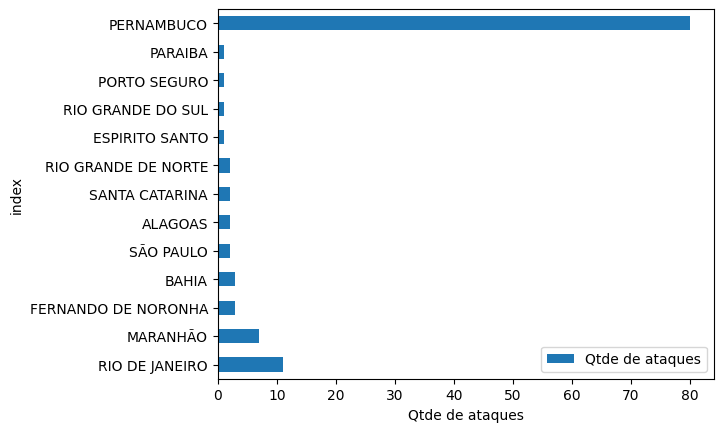

In [48]:
br_x_pe = pd.concat([br_ex_pe, pe])
ax = br_x_pe.plot(kind='barh')
ax.set_xlabel('Qtde de ataques')
ax.set_ylabel('index')
plt.show()

## Quantidade de ataques Brasil x Mundo:

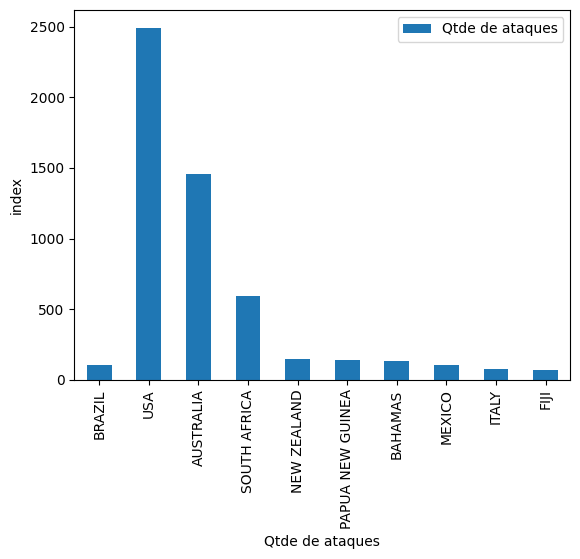

In [49]:
mundo_x_br = pd.concat([ataques_tot_br,ataques_tot_mundo])
ax_mundo = mundo_x_br.plot(kind='bar')
ax_mundo.set_xlabel('Qtde de ataques')
ax_mundo.set_ylabel('index')
plt.show()

## Quantidades de ataques em Pernambuco de 70 até 2023:

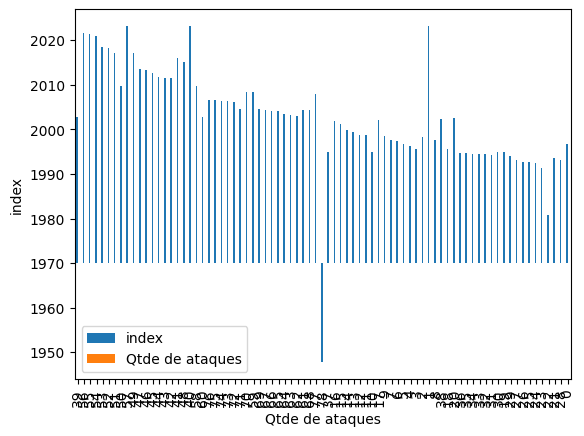

In [50]:

ax_data = df_data.plot(kind='bar')
ax_data.set_xlabel('Qtde de ataques')
ax_data.set_ylabel('index')
plt.show()

## Quantidade de ataques após as obras de 90:

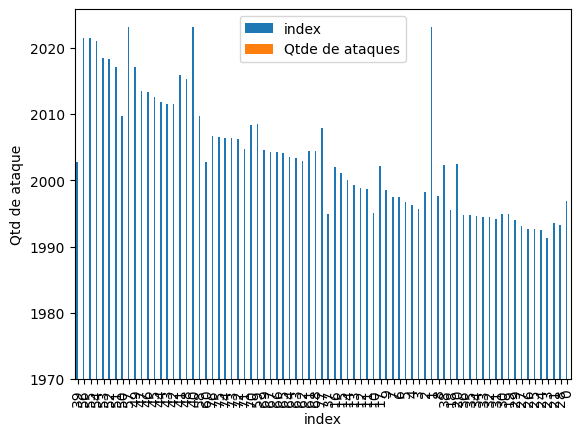

In [51]:
obras
ax_obras = obras.plot(kind='bar')
ax_obras.set_xlabel('index')
ax_obras.set_ylabel('Qtd de ataque')
plt.show()

# **Conclusão:**

## A base de dados nos fornece 95% dos casos registrados apenas na década de 90, limitando assim a compreensão do aumento de casos relacionados à manutenção portuária. Impõe-se a necessidade de dados mais robustos e locais para complementar a análise.